# Laplacian Eigenmaps and Spectral Embedding
This is the final section in *Manifold Learning: Introduction and Foundational Algorithms*, and the entire project can be viewed at https://github.com/drewwilimitis/Manifold-Learning <br>
<br>
`Drew Wilimitis`

>"I developed my theory of infinitely many variables from purely mathematical interests, and even called it 'spectral analysis' without any presentiment that it would later find application to the actual spectrum of physics" - David Hilbert

First, we begin with a restatement of the manifold learning setting: assume we have data $x_{1}, x_{2}, \cdots, x_{n} \in \mathbb{R}^{N}$ that are sampled from an unknown manifold $M \subset \mathbb{R}^{N}$. Our goal is to construct a lower dimensional embedding of the data, where we find a transformation of the original data to the corresponding lower dimensional points $y_{1}, y_{2}, \cdots, y_{n} \in \mathbb{R}^{m}$ with $m < N$. <br>
<br>
We first attempt to model the continuous, underlying manifold by constructing a graph $G = (V, E)$ out of the discrete data points. We let the data points $x_{1}, x_{2}, \cdots, x_{n}$ be the nodes of our graph, and we connect neighboring points with edges. This graph will then contain information about the structure of the manifold. The local relationships and intrinsic geometry of the manifold are reflected in the graph edges, which are given weights that indicate similarity between data points. <br>
<br>
So far this is very similar to other manifold learning algorithms, where the manifold is first assumed and the neighborhood graph is constructed. The distinguishing aspect of Laplacian Eigenmaps/Spectral Embedding is the use of the Laplacian Matrix (or Graph/Discrete Laplacian), a discrete analog of the Laplacian operator. We use the eigenvalue decomposition of the Laplacian Matrix $L$, and by utilizing some of the associated properties of the Laplacian Matrix, we are able to find an optimal, lower dimensional embedding that preserves the assumed manifold structure of the data.

### Algorithm Outline: 
**Input:** Data vectors $\mathbf{x_1}, ..., \mathbf{x_n} \in \mathbb{R^p}$ with parameters k (nearest neighbors) and m (embedding dimension)<br>
**Output:** Lower dimensional embedding vectors $\mathbf{y_i}, ..., \mathbf{y_n} \in \mathbb{R^m}$ with m < P
<br>
**Steps**: <br>
1. kNN graph: construct nearest neighbors graph and the adjacency matrix $W \in \mathbb{R}^{n \times n}$<br>
2. Graph Laplacian (Laplacian Matrix): use degree matrix $D$ and adjacency matrix to compute the Laplacian $\mathbf{L} = D - W$ <br>
3. Eigenvector Embedding:  use the first m eigenvectors $f_1, ..., f_m$ (with the m smallest nonzero eigenvalues) of the Laplacian matrix to map each $x_i$ to lower dimensional vectors $y_i \in \mathbb{R}^m$

## Step 1: kNN graph and adjacency matrix

Given our input $\mathbf{x_1}, ..., \mathbf{x_n} \in \mathbb{R^p}$, we have two common options to find the nearest neighbors for each data point. The first option is to use an $\varepsilon$-neighborhood, where we use the set of all points within some neighborhood centered at $x_i$: <br>
<br>
$$\mathbf{B}(x_i) = \left\{ x_{j} \in \mathbb{R}^{p} \ | \ \ d(x_{i}, x_{j}) < \varepsilon \right\}$$
<br>
There is no fixed amount of points in any given neighborhood and as long as points are within $\varepsilon$ of $x_i$ they are considered to be neighbors. The following figure illustrates an open neighborhood (does not include the boundary) around the point p:

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Neighborhood_illust1.png/256px-Neighborhood_illust1.png)

The second option is to use the k nearest neighbors for each data point. We can simply compute all the pairwise distances in the ambient space using the standard Euclidean (or any other) metric, then taking the k nearest data points for each $x_i$. In this case there is a fixed number (k) of points within each neighborhood.

Next, define the kNN or adjacency graph $$G = ({V, E)}$$ <br>
Let every data point $x_i$ be a node $v_i \in V$ with edges $e_{ij}$ connecting the node $x_i$ to $x_j$ if $x_j$ is a neighbor of $x_i$.

Given this graph, we define similarity weights for the edges. Just like we have two options for defining the neighborhoods, we also have two options for defining the edge weights of the adjacency graph. 

1.) **Simple approach**: given data points $x_i$, $x_j$ define the corresponding edge weights by <br>
<br>
$$
\ w_{i,j} = \begin{cases} 
      1 & x_j \ \text{is a nearest neighbor of $x_i$} \\
      0 & otherwise \\ 
   \end{cases}
\\ $$

2.) **Heat kernel approach**: given data points $x_i$, $x_j$ define the corresponding edge weights by <br>
<br>
$$
\ w_{i,j} = \begin{cases} 
      e^{-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{t}} & x_j \ \text{is a nearest neighbor of $x_i$} \\
      0 & otherwise \\ 
   \end{cases}
\\ $$

By using the simple approach, all of the neighbors of $x_i$ are weighted equally, but with the heat kernel approach the neighbors can have different weights. We let $w_{i,j}$ be the entries of the adjacency or similarity matrix $W \in \mathbb{R}^{n\times n}$.

## Step 2: The Laplacian

### General Laplacian Operator

In general, the Laplacian operator is a second order differential operator defined on continuous functions. It is used extensively in the applied sciences, for example to model diffusion phenomena in physics and to detect objects and edges in image processing. Given some function $f$ defined at a point $x$, and assuming f is also defined over the surrounding neighborhood, the Laplacian can be interpreted as the rate of change in the average value of $f$ as the neighborhood expands, or diffuses, outwardly.

**Definition** - The Laplacian operator ($\Delta f$) for some function $f$, assuming f is twice differentiable (and therefore continuous), is given by the following sum of second order partial derivatives:
$$
\Delta f= - \sum_{i=1}^{n} \frac{\partial^{2} f}{\partial x_{i}^{2}}
$$
Notation: $\Delta f=\nabla^{2} f=\nabla \cdot \nabla f$

The Laplacian is referred to as an *operator* because it represents a map from a space of functions (in this case the space of order-k continuous functions $C^{k}$), to some other space of functions: $\Delta : C^{k}\left(\mathbb{R}^{n}\right) \rightarrow C^{k-2}\left(\mathbb{R}^{n}\right)$. In a similar sense, differentiation is often considered to be an operator that maps a function to another function.  <br> 
<br>
$\nabla \cdot$ is the *divergence* and $\nabla f$ is the *gradient* of $f$, which are related to notions of higher dimensional derivatives from multivariable calculus. The Laplacian $\Delta f$ is equivalently stated as the divergence of the gradient: 

$$\Delta f =\operatorname{div} (\operatorname{grad} f)$$

### Divergence, gradient, and interpreting the Laplacian

The **gradient** of a scalar function $\mathbf{f} : \mathbb{R}^{n} \rightarrow \mathbb{R}$ can be roughly interpreted as the multidimensional equivalent of the univariate derivative, and it is given by a vector of the partial derivatives of f with respect to each of its coordinates: <br>
<br>
$$
\nabla f = \left(\frac{\partial f}{\partial x_{1}}, \dots, \frac{\partial f}{\partial x_{n}}\right)
$$ <br>
The gradient $\nabla f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$ is a vector that, for each point it's defined at, gives the direction and magnitude of the greatest increase in the function $f$.

![title](https://upload.wikimedia.org/wikipedia/commons/0/0f/Gradient2.svg)
In this figure, the black regions represent higher function values and the white regions represent lower function values. The blue vectors represent the gradient of this function, which points in the direction of the maximal positive slope i.e. towards the maximal function values.

The **divergence** of a given vector field $\mathbf{F}=\left(F_{1}, F_{2}, \ldots F_{n}\right)$ is a scalar field (a function that produces a scalar valued quantity at each point in space). The divergence of a vector field at a given point can be interpreted as a measure of the net flux of $F$ in an infinitesimal region around the point. The divergence gives a net balance indicating whether some vector quantity is exiting or entering a given point in space. We have the following definition of the divergence of a vector field:

$$
\operatorname{div} \mathbf{F}=\nabla \cdot \mathbf{F}=\frac{\partial F_{1}}{\partial x_{1}}+\frac{\partial F_{2}}{\partial x_{2}}+\cdots+\frac{\partial F_{n}}{\partial x_{n}}
$$
where $\operatorname{div} \mathbf{F}: \mathbb{R}^{n} \rightarrow \mathbb{R}$.

![title](https://upload.wikimedia.org/wikipedia/commons/e/ee/Divergence_%28captions%29.svg)
This figure illustrates vector fields $V$ with positive, negative, and zero divergence $\nabla \cdot (\mathbf{V})$. The example on the left has net flux away from the origin (source), as the vector quantity is moving outward and diverging. The middle has net flux toward the origin (sink), as the vector field is moving inward. The right has no net flux as the vector quantities exiting and entering the space cancels out, and so the divergence is zero.

To conceptually understand the Laplacian operator, we have to combine these two concepts and understand what it means to take the divergence of the gradient of a function $f$. A visual example helps tremendously here as well, and below we plot a sample scalar valued function.

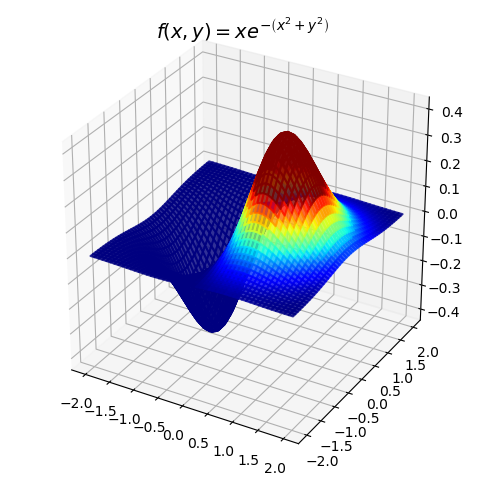

In [186]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.pylabtools import figsize
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
np.random.seed(8888)
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

# draw samples to create the grid
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
x,y = np.meshgrid(x,y)

# scalar function
z = x*np.exp(-1*(x**2 + y**2))

# plot 3d surface
fig = plt.figure(figsize = (6, 6))
ax = fig.gca(projection = '3d')
colors = plt.cm.jet(z*4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=colors, cmap=plt.cm.coolwarm, linewidth=1.4, alpha=0.8)
ax.set_title(r'$f(x, y)=x e^{-\left(x^{2}+y^{2}\right)}$', size=14);

Given this real-valued function $f(x, y)=x e^{-\left(x^{2}+y^{2}\right)}$, we take the gradient of $f$ and plot the resulting two dimensional vector field: $\nabla f (x, y) = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)$

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Gradient_of_a_Function.tif/lossy-page1-840px-Gradient_of_a_Function.tif.jpg)
The vectors (blue arrows) point in the direction of the maximal positive slope, and so the vectors are approaching the maximum of $f$ and moving away from the minimum. The size of these vectors indicates the magnitude of the slope, which agrees with the apparent slope from the plotted function $f$. To get the Laplacian, we take the divergence of this gradient. Since this gradient vector field is moving away from the minimum, the divergence of the gradient (Laplacian) is positive with the highest value near the minimum of the function $f$. Conversely, since the gradient field is moving inward near the function maximum, the divergence of the gradient (Laplacian) has smaller values at this point. <br>
<br>
Therefore, the Laplacian will have lower values when the slope is decreasing, and will have higher values when the slope is increasing. The Laplacian is somewhat analogous to the second derivative test for univariate functions, where the sign (+,-) of the second derivative is related to the change in slope and whether a point is a maximum or a minimum. 

### Discrete (Graph) Laplacian
So far we have only mentioned the Laplacian in the general, continuous case. The underlying form of the Laplacian operator needs to be modified in our discrete case, where we now have a finite graph whose nodes represent the input data points. 

We would still like for the Laplacian to be an operator in the discrete case, such that it takes functions as inputs and maps them to other functions. However, in our case these functions will be defined on a discrete domain - the finite set of vertices $V$ for the graph $G$. Therefore, we can assume the discrete Laplacian operator $(\Delta \phi)(v)$ acts on a function $\phi : V \rightarrow R$, where $\phi$ is a function defined on the vertices of the graph (our data points). 

We also use finite differences as the discrete analog of the derivative, and so instead of using derivatives to compare the local regions in a continuous domain, we use the finite differences to compare the local neighborhoods of our discrete graph.

For a function $\phi : V \rightarrow R$ defined on the vertices of a graph $G$, we define the discrete Laplacian operator (graph Laplacian) as: <br>
<br>
$$
(\Delta \phi)(v_i)= -\sum_{v_j} W_{ij}[\phi(v_i)-\phi(v_j)]
$$
<br>
where we sum over all $v_j$ that are in the neighborhood of $v_i$, with the similarity weight for edge $e_{ij}$ given as $W_{ij}$.<br>

Just like the continuous case, the discrete Laplacian will have lower values when $\phi(v_i)$ is greater than its surrounding neighborhood (the maximum of f) and will have higher values when $\phi(v_i)$ is lower than its surrounding neighborhood (the minimum of f). 

### Constructing the Laplacian Matrix

We represent the discrete Laplacian operator as a matrix. Our function $\phi$ can be written as a column vector, and $\Delta \phi$ is the product of this column vector and the Laplacian matrix $L$.
<br>

\begin{equation}
\underset{n\times 1}{\Delta \phi} =  \underset{n\times n}{L} \times 
\underset{n\times 1}{\phi}
\end{equation}
<br>
$(\Delta \phi)(v_i)$ is then the i'th entry of this product vector.

There's a simple formula to compute the Laplacian matrix $L$ from the constructed neighborhood graph, which involves the degree and adjacency matrices. Each node $v_i$ has an associated degree, which gives a measure of the node's connectivity. The degree for a given node is equal to the number of edges connected to it. We compute the diagonal degree matrix $D$, which has diagonal entries $D_{ii} = deg(v_i)$, by taking the column sums (or row sums, since W is symmetric) of $W$:

$$
D_{i i}=\sum_{j} W_{i j}
$$

Then the Laplacian matrix $L$ is also symmetric, and we have $L \in \mathbb{R}^{n \times n}$ with $L = D - W$

The following example shows a calculation of the Laplacian matrix for a simple graph:
![title](https://user-images.githubusercontent.com/16658498/59164486-eb7b4380-8ad2-11e9-977d-f997501688dc.PNG)

## Step 3: Eigenvector Decomposition and Embedding

Given the Laplacian matrix $L$, we define the eigenvectors of $L$ as the vectors $f_i \in \mathbb{R}^{n}$ that satisfy: 

$$
L f_i=\lambda_i f_i
$$

with corresponding eigenvalues $\lambda_i$ and $f_i \neq 0$. Since $L$ is symmetric and positive semi-definite, we are guaranteed real, non-zero eigenvalues.

When evaluating a potential embedding transformation, a reasonable standard would be that the function preserves local distances - i.e. inputs that are close in the original space remain close after applying the transformation. Let the transformation be defined by $\phi (x_{i}) = y_i$, which maps inputs $x_i \in \mathbb{R}^p$ to the lower dimensional $y_i \in \mathbb{R}^m$. We might formulate a cost or objective function that reflects our local distance preserving criteria: <br>
<br>
$$\sum_{i j}\left(\phi(x_{i})-\phi(x_{j})\right)^{2} W_{i j}$$ 
<br>
Since $W_{i j} = 0$ if $x_{i}$ and $x_{j}$ aren't neighbors, we are effectively summing the difference of the function values for points within local neighborhoods. The $W_{ij}$ term penalizes this difference when $x_{i}$ and $x_{j}$ are highly similar. <br>
<br>
We write this objective function in terms of the Laplacian matrix by observing the following:<br>
<br>
$$
\begin{aligned} \sum_{i, j}\left(y_{i}-y_{j}\right)^{2} W_{i j} &=\sum_{i, j}\left(y_{i}^{2}+y_{j}^{2}-2 y_{i} y_{j}\right) W_{i j} \\ &=\sum_{i} y_{i}^{2} D_{i i}+\sum_{j} y_{j}^{2} D_{j j}-2 \sum_{i, j} y_{i} y_{j} W_{i j}=2 \mathbf{y}^{T} L_{\mathbf{y}} \end{aligned}
$$
<br>
which implies that <br>
$$
\frac{1}{2} \sum_{i, j}\left(y_{i}-y_{j}\right)^{2} W_{i j}=\mathbf{y}^{T} L \mathbf{y}
$$

To define an optimal embedding, given this criteria and some fixed input data that produces the Laplacian matrix $L$, we need to find $y$ that minimizes the objective function: <br>
<br>
$$
\underset{\mathbf{y}}{\operatorname{argmin}} \mathbf{y}^{T} L \mathbf{y} = \underset{\mathbf{y}}{\operatorname{argmin}} \langle L \mathbf{y}, \mathbf{y}\rangle
$$
<br>
We impose an additional constraint: $y^{T} D y=1$ to fix the scaling and another constraint $y^{T} D \mathbf{1} = 0$, where $\mathbf{1}$ is the vector of all ones, to eliminate the trivial solution where $y = 1$ and eigenvalue $\lambda = 0$. 

This leaves us with a generalized eigenvalue problem, in which case the first m non-zero eigenvectors of $L$ solves this optimization problem and defines our optimal embedding. We apply the following transformation with the eigenvectors: <br>
<br>
$$\mathbf{x}_{i} \rightarrow\left(\mathbf{f}_{1}(i), \ldots, \mathbf{f}_{m}(i)\right)$$
<br>
To map the input $x_i$ into $\mathbb{R}^{m}$, we let the output $y_i$ have these m components where each component is the i'th entry of the respective eigenvectors.

### <font color='blue'> Example - Graph Laplacian with networkx</font>

Given some very basic data, consider the problem of mapping these data points to the real line $\mathbb{R}$ in a way that optimally preserves local geometric relationships. We might approach this by attempting to find an embedding that preserves the distances between points in the original space, such that points close together in the original space remain close together when mapped to $\mathbb{R}$. Here we will use the networkx python package to draw a basic graph and use the Laplacian matrix to find such an embedding. 

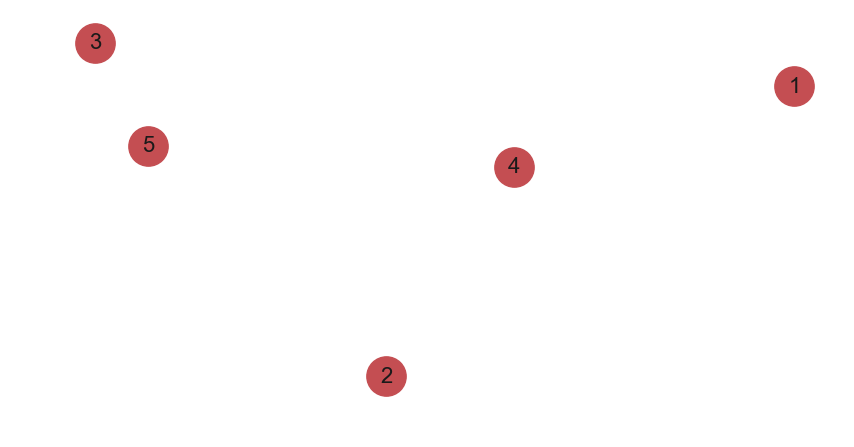

In [329]:
import networkx as nx

# adding a list of edges:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
pos = nx.random_layout(G, seed=8888)
plt.figure(figsize=(8,4))
nx.draw(G,pos,node_size=800,font_size=16,with_labels=True)
plt.show();

Given this data $x_{1}, x_{2}, \cdots, x_{n} \in \mathbb{R}^{2}$, we first construct the adjacency graph where we let each node represent one data point. For this example, we will put an undirected edge connecting each $x_i$, or node $v_i$, to its closest k neighboring points. We can get the coordinates of the data points with networkx and then compute the pairwise distances to find each node's nearest neighbor:  

In [330]:
pos

{1: array([0.96238434, 0.69422036], dtype=float32),
 2: array([0.44226614, 0.02448785], dtype=float32),
 3: array([0.07069068, 0.7940371 ], dtype=float32),
 4: array([0.6052884, 0.5077291], dtype=float32),
 5: array([0.13890399, 0.5566335 ], dtype=float32)}

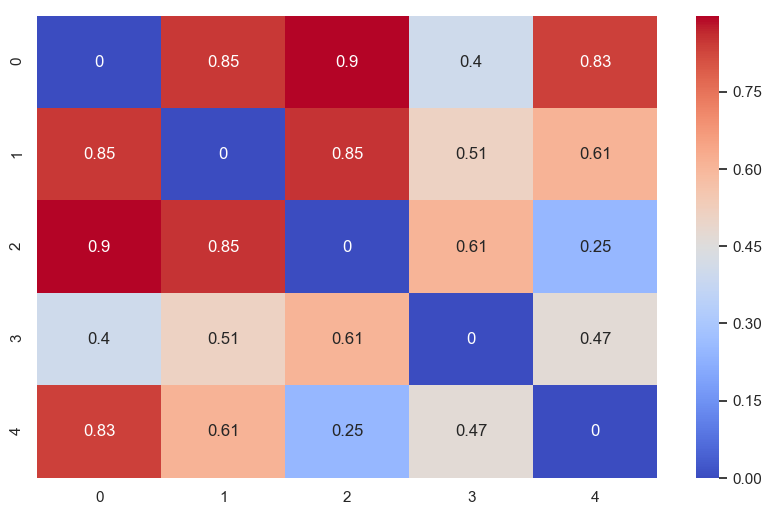

In [331]:
from sklearn.metrics import pairwise_distances
import seaborn as sns
X = np.array(list(pos.values()))
A = pairwise_distances(X)
plt.figure(figsize=(10,6))
sns.set()
sns.heatmap(A, cmap="coolwarm", annot=True);

In [332]:
# number of nearest neighbors for the graph.
k = 2

# get indices and sorted distances
DNN, NN = np.sort(A), np.argsort(A)
NN = NN[:,1:k+1]
DNN = DNN[:,1:k+1]
edges = []
for i in range(len(NN)):
    for j in range(len(NN[i])):
        edges.append((i+1, NN[i][j] + 1))
# list of edge pairs        
edges

[(1, 4),
 (1, 5),
 (2, 4),
 (2, 5),
 (3, 5),
 (3, 4),
 (4, 1),
 (4, 5),
 (5, 3),
 (5, 4)]

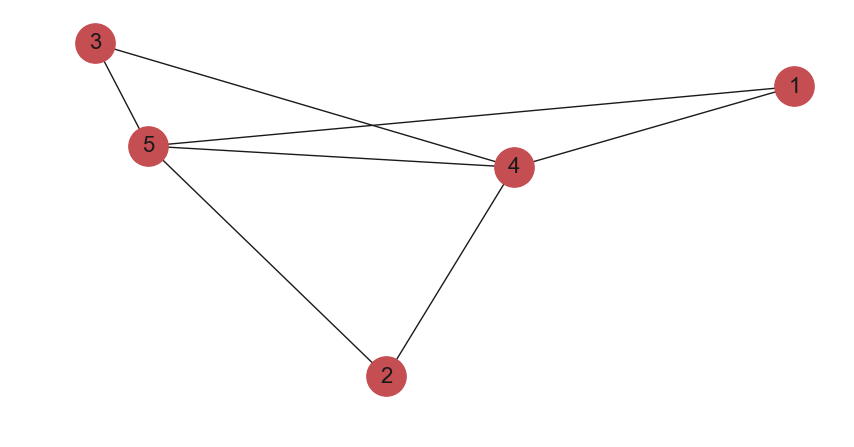

In [335]:
# adding a list of edges:
G.add_edges_from(edges)
plt.figure(figsize=(8,4))
nx.draw(G,pos,node_size=800,font_size=16,with_labels=True)
plt.show();

From this graph G, we use the networkx package to find the adjacency matrix, and in this case for given data points $x_i$, $x_j$ we define the corresponding edge weights by <br>
<br>
$$
\ w_{i,j} = \begin{cases} 
      1 & x_j \ \text{is a nearest neighbor of $x_i$} \\
      0 & otherwise \\ 
   \end{cases}
\\ $$

We can find the diagonal degree matrix $D$ given by entries $D_{i i}=\sum_{j} W_{i j}$, and we can also find the Laplacian matrix $L = D - W$ with the networkx package.

In [338]:
# optional heat kernel for edge weights
def heat_kernel(x, y):
    dist_2 = np.linalg.norm(x - y)**2
    w = np.exp(-dist_2)
    return w

def laplacian(X, gaussian=False):
    if gaussian:
        W = np.zeros((X.shape[0], X.shape[0]))
        for i in range(W.shape[0]):
            for j in range(W.shape[0]):
                if j in NN[i]:
                    W[i][j] = heat_kernel(X[i], X[j])
        node_degrees = W.sum(axis=1)
    else:
        W = nx.adjacency_matrix(G).todense()
        node_degrees = [x[1] for x in list(G.degree())]
    # create diagonal degree matrix
    D = np.diag(node_degrees)
    print('Adjacency matrix: \n', W)
    print('Degree matrix: \n', D)
    L = D - W
    print('Laplacian matrix: \n', L)
    return L

L = laplacian(X)

Adjacency matrix: 
 [[0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]
Degree matrix: 
 [[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]
Laplacian matrix: 
 [[ 2  0  0 -1 -1]
 [ 0  2  0 -1 -1]
 [ 0  0  2 -1 -1]
 [-1 -1 -1  4 -1]
 [-1 -1 -1 -1  4]]


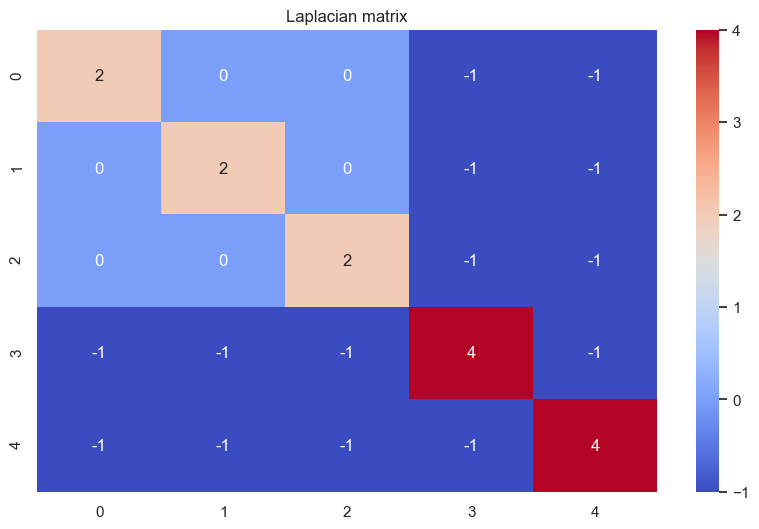

In [339]:
plt.figure(figsize=(10,6))
plt.title('Laplacian matrix')
sns.heatmap(L, annot=True, cmap="coolwarm");

Next, we find the eigenvalues and eigenvectors of the Laplacian matrix. The "spectrum" of spectral embedding and spectral clustering refers to this spectrum of eigenvalues, which is related to certain graph properties like connectivity. Since the Laplacian matrix is symmetric, the Spectral Theorem states that the eigenvectors of L form an orthonormal basis of $\mathbb{R^n}$, and each eigenvalue is real and non-negative. <br>
<br>
0 will always be an eigenvalue of the Laplacian matrix with the related eigenvector as the vector of all 1s. Since the column and row sums of L are zero, multiplying with the constant vector $\mathbf{1}^{T} = [1, ..., 1]$ will also be equal to 0. The eigenvalues are not necessarily all distinct, and in fact the number of times that 0 is repeated as an eigenvalue (its multiplicity), will be equal to the number of connected components in the graph. We only consider the first m non-zero eigenvalues and their related eigenvectors.

Largest eigenvalue: 4.999999999999999
Smallest eigenvalue: -1.1102230246251565e-16


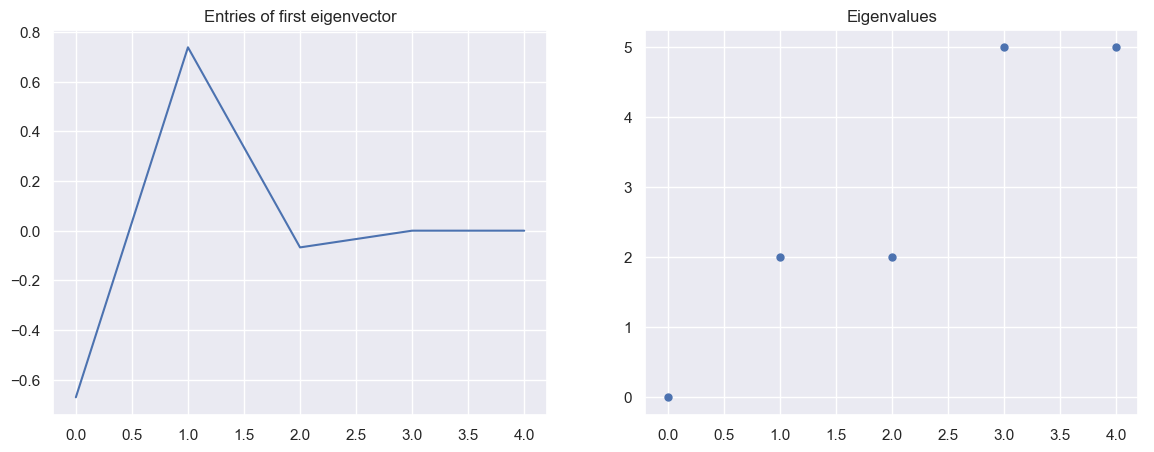

In [340]:
import pandas as pd
from networkx import *
eigvals, eigvecs=np.linalg.eigh(L)
print("Largest eigenvalue:", max(eigvals))
print("Smallest eigenvalue:", min(eigvals))

eigvecs = pd.DataFrame(eigvecs)

fig = plt.figure(figsize=(14,5))
fig.add_subplot(121)
plt.title("Entries of first eigenvector")
m = 1
for i in range(1, m+1):
    plt.plot(eigvecs.iloc[:10,i])
    
fig.add_subplot(122)
plt.plot(eigvals, '.', markerSize = 10)
plt.title("Eigenvalues");

In order to map our data $x_{1}, x_{2}, \cdots, x_{n} \in \mathbb{R}^{2}$ into $\mathbb{R}$, we take $m=1$ and only use the first eigenvector for our embedding. This first eigenvector $\mathbf{f_1} \in \mathbb{R}^{n}$ has $n$ components that we take as the embedding coordinates $y_i$ for our data (in this case these coordinates are $y_{i} \in \mathbb{R}$): $\mathbf{x}_{i} \rightarrow\mathbf{f}_{1}(i)$. <br>
<br>
$$\mathbf{f_1} = \begin{bmatrix}
f_{11} \\
f_{12} \\
\vdots & \\
f_{1n}  
\end{bmatrix}$$<br>
These embedding coordinates are plotted on the real line below.

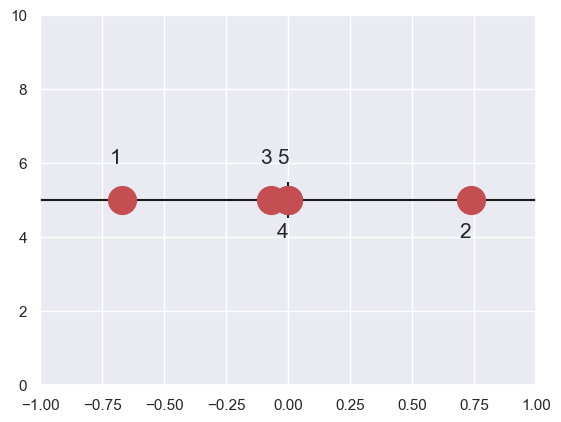

In [341]:
# set up figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1,1)
ax.set_ylim(0,10)

# draw lines
xmin = -1
xmax = 1
y = 5
height = 1

plt.hlines(y, xmin, xmax)
plt.vlines(0, y - height / 2., y + height / 2.)

# use eigenvectors to map points to the line
for index, px in enumerate(eigvecs.iloc[:,1]):
    plt.plot(px, y, 'ro', ms = 20, mfc = 'r')
    plt.text(px, y + (-1)**index, str(index+1), horizontalalignment='right', size=15)

plt.show();

### <font color='blue'> Example - Brown Corpus Text Data</font>

We now work with another common source of high dimensional data: text analysis. Using the `nltk` library we can import the Brown corpus, which contains many published text documents classified into different categories. 

In [342]:
import nltk
path = 'C:/Users/dreww/AppData/Roaming/nltk_data/corpora'
from nltk.corpus import brown

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

We first convert the data to a vectorized form by using word counts for sentences in these selected categories - ('news', 'fiction', 'reviews') - and applying the tf-idf transformer from sklearn.

In [343]:
sent_dict = {}
brown_categories = ['news', 'fiction', 'reviews']
for category in brown_categories:
    sent_dict[category] = np.array(brown.sents(categories=category))

In [344]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 

# define functions for stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [358]:
train_text = [' '.join(sent) for sent in brown.sents(categories=brown_categories)]
text = remove_stopwords(train_text)

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 6000,
                             ngram_range=(1, 3))
vectorizer.fit(train_text)
feature_vec = vectorizer.fit_transform(train_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=6000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [359]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(feature_vec)

In [360]:
feature_data = []
for category in sent_dict:
    cat_data = [' '.join(sent) for sent in sent_dict[category]]
    feature_data.append(tf_transformer.transform(
        vectorizer.transform(cat_data)))

df = [np.array(arr.todense()) for arr in feature_data]

category_labels = []
for category in brown_categories:
    category_labels.append(np.repeat(category, len(
        np.array(brown.sents(categories=category)))))

labels = np.hstack((category_labels))
final_df = np.vstack((df))

final_df.shape
labels.shape

(10623, 6000)

(10623,)

We now have a very high dimensional dataset with thousands of features, each indicating how frequently the different sentences in the genre categories contain certain words. Using spectral embedding, the data can be reduced to a lower dimension.

In [361]:
data = pd.DataFrame(final_df)
data['label'] = labels
data = data.loc[np.random.randint(0, len(data), size=1500)]
data.head()
data.shape
final_data = data.drop(['label'], axis=1)
final_labels = np.array(data['label'])

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,label
3342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,news
3515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,news
2157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,news
6099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fiction
4136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,news


(1500, 6001)

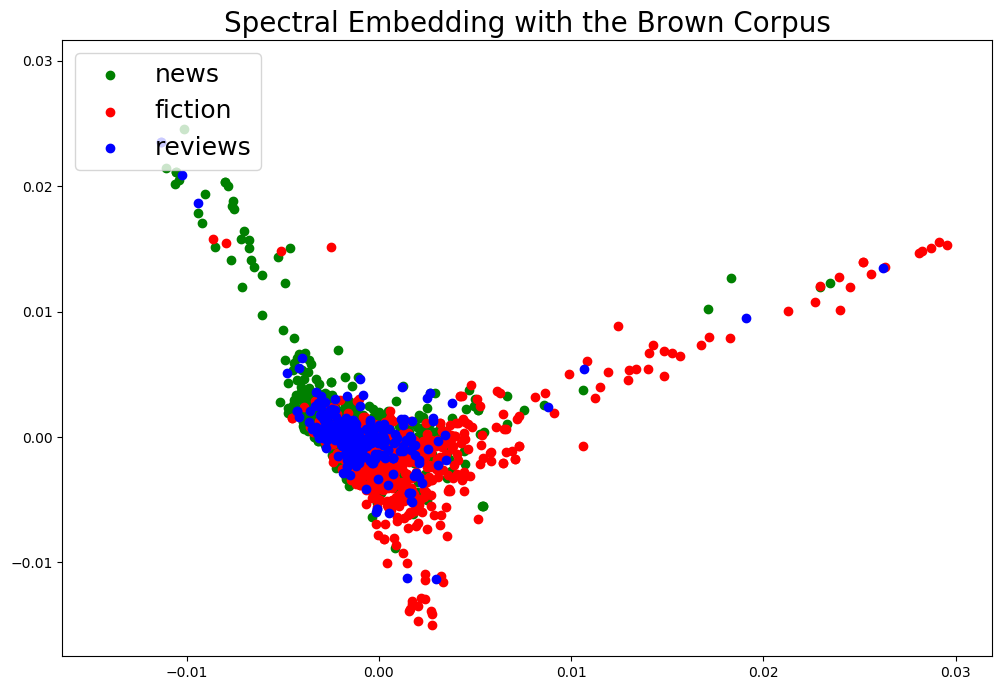

In [366]:
from sklearn.manifold import SpectralEmbedding
# apply spectral embedding with output dimension = 2
model = SpectralEmbedding(n_components=2, n_neighbors=45)
proj = model.fit_transform(final_data)

# plot the spectral embedding
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(12,8))
colors = {'news': 'green', 'religion': 'purple', 'fiction': 'red', 'government': 'black',
         'reviews': 'blue'}

plt.scatter(proj[data['label'] == 'news', 0], proj[data['label'] == 'news', 1], c='green', label='news')
plt.scatter(proj[data['label'] == 'fiction', 0], proj[data['label'] == 'fiction', 1], c='red', label='fiction')
plt.scatter(proj[data['label'] == 'reviews', 0], proj[data['label'] == 'reviews', 1], c='blue', label='reviews')
plt.title('Spectral Embedding with the Brown Corpus', size=20)
plt.legend(loc='upper left', fontsize=18)
plt.show()
plt.savefig('brown_corpus_laplacian.png');

The results seem to show that the algorithm was able to uncover some intrinsic structure that distinguishes news from fiction, with the reviews left somewhere in the middle. This differentiation makes sense intuitively as reviews are more likely to be opinionated than printed news, but still containing some measure of truth and reference to current events. 

Finally, we also show the spectral embedding with 3 components.

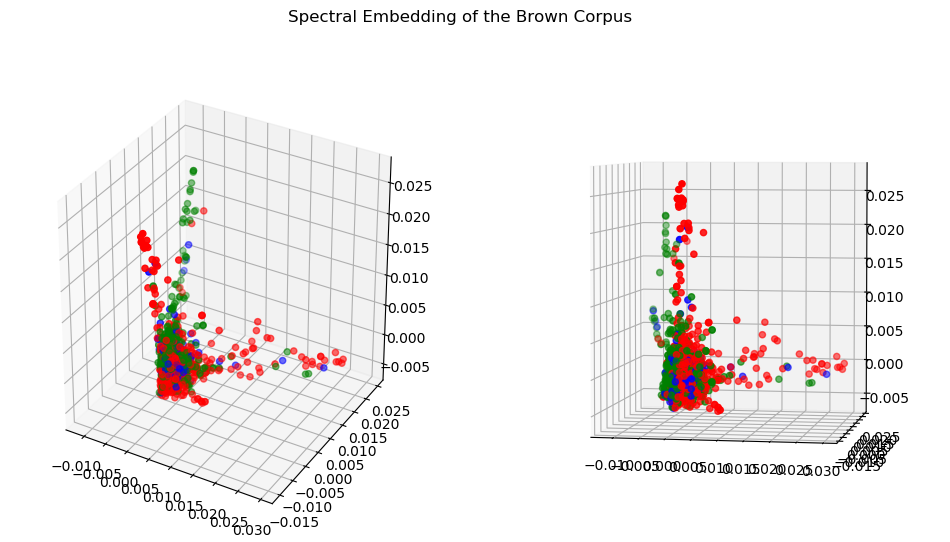

In [370]:
from sklearn.manifold import SpectralEmbedding
%matplotlib inline
# apply spectral embedding with output dimension = 3
model = SpectralEmbedding(n_components=3, n_neighbors=45)
proj = model.fit_transform(final_data)

# plot the spectral emedding
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
colors = {'news': 'green', 'religion': 'purple', 'fiction': 'red', 'government': 'black',
          'reviews': 'blue'}
ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2],
           c=data['label'].apply(lambda x: colors[x]))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2],
           c=data['label'].apply(lambda x: colors[x]))
ax.view_init(4, -80)
plt.suptitle('Spectral Embedding of the Brown Corpus')
plt.show()

In [9]:
from IPython.core.display import HTML


def css_styling():
    styles = open("custom_style.css", "r").read()
    return HTML(styles)


css_styling()

### References

-  [1] Belkin, Niyogi. *Laplacian Eigenmaps for Dimensionality Reduction and Data Representation*. Neural Computation 15, 1373–1396 (2003)
-  [2] https://en.wikipedia.org/wiki/Laplacian_matrix
-  [3] https://en.wikipedia.org/wiki/Laplace_operator